In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0067.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0153.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0105.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0018.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0050.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0029.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0195.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0051.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0074.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0142.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0149.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0121.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0194.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0003.png
/kaggl

In [2]:
from PIL import Image # For working on images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
from random import randint # Random function.
!pip install keras
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 497.5 MB 19 kB/s              
     |████████████████████████████████| 462 kB 33.6 MB/s            
     |████████████████████████████████| 2.1 MB 31.2 MB/s            
     |████████████████████████████████| 1.4 MB 29.2 MB/s            
     |████████████████████████████████| 5.8 MB 26.1 MB/s            
     |████████████████████████████████| 14.5 MB 29.9 MB/s            
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.2
    Uninstalling tensorflow-2.6.2:
      Successfully uninstalled tensorflow-2.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are

# Using Gesture_number_identifier

In [3]:
Gesture_number_identifier = dict()
Gesture_identifier = dict()
count = 0
for j in os.listdir('../input/leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'): # to ensure we are not reading hidden folders
        Gesture_number_identifier[j] = count
        Gesture_identifier[count] = j
        count = count + 1
print(Gesture_number_identifier)
print()
print(Gesture_identifier)

{'02_l': 0, '04_fist_moved': 1, '09_c': 2, '10_down': 3, '06_index': 4, '08_palm_moved': 5, '07_ok': 6, '05_thumb': 7, '01_palm': 8, '03_fist': 9}

{0: '02_l', 1: '04_fist_moved', 2: '09_c', 3: '10_down', 4: '06_index', 5: '08_palm_moved', 6: '07_ok', 7: '05_thumb', 8: '01_palm', 9: '03_fist'}


In [4]:
x_data = []
y_data = []
datacount = 0 #  We keep track to tally how many images are in our dataset
for i in range(0, 10): # We have looped over the ten top-level folders
    for j in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # This is done again to avoid hidden folders
            count = 0 # We keep track to tally images of a given gesture
            for k in os.listdir('../input/leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # we Loop over the images in each folder 
                img = Image.open('../input/leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), Gesture_number_identifier[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

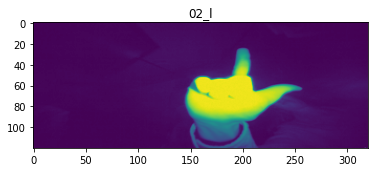

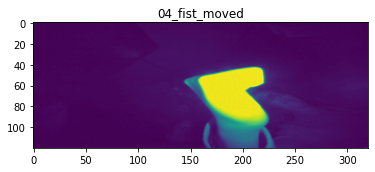

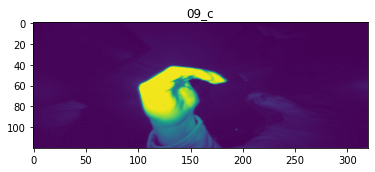

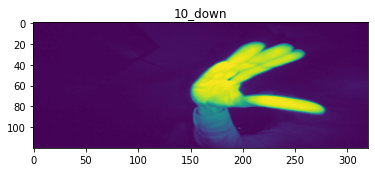

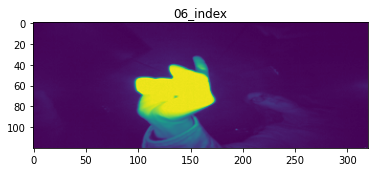

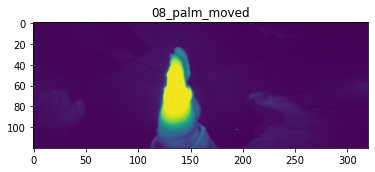

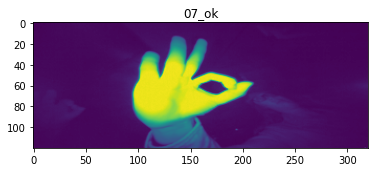

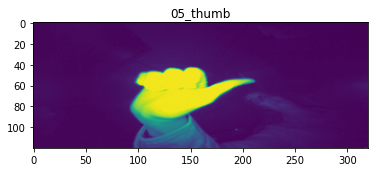

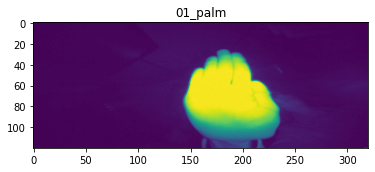

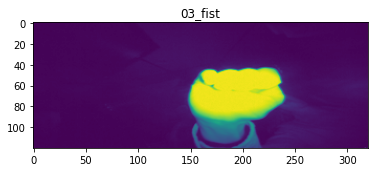

In [5]:
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(Gesture_identifier[y_data[i*200 ,0]])
    plt.show()

In [6]:
y_data = to_categorical(y_data)
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [7]:
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)